In [1]:
import pandas as pd
import datetime

In [2]:
# Reading in data

crimes = pd.read_csv('Crimes.csv')
full_moon = pd.read_csv('full_moon.csv')
holidays = pd.read_csv('holidays.csv')
weather = pd.read_csv('weather.csv')
unemploy = pd.read_csv('CHIC917URN.csv')

In [4]:
unemploy

,DATE,CHIC917URN
0,1990-01-01,6.9
1,1990-02-01,6.6
2,1990-03-01,6.3
3,1990-04-01,6.5
4,1990-05-01,6.1
...,...,...
404,2023-09-01,4.7
405,2023-10-01,4.4
406,2023-11-01,4.3
407,2023-12-01,4.1


Here each date column is turned into a simple date time of the form Year/Month/Day to more easily join them together.

In [5]:
# Aligning date columns to allow for joining

weather['date'] = pd.to_datetime(weather['datetime'])
weather.drop(columns=['datetime'], inplace = True)

crimes['Date'] = pd.to_datetime(crimes.Date)
crimes['date'] = pd.to_datetime(pd.to_datetime(crimes['Date']).dt.date)
crimes['time'] = pd.to_datetime(crimes['Date']).dt.time
crimes['day_of_week'] = pd.to_datetime(crimes['date']).dt.day_of_week
crimes.drop(columns=['Date'], inplace=True)

full_moon['date'] = pd.to_datetime(full_moon.FullMoonDates)
full_moon.drop(columns=['FullMoonDates', 'Year'], inplace=True)
full_moon['full_moon'] = (pd.DataFrame({'full_moon': pd.Series(['full moon'] * len(full_moon))}))

holidays['date'] = pd.to_datetime(holidays.Date)
holidays.drop(columns = ['Date'], inplace=True)

unemploy['date'] = pd.to_datetime(unemploy['DATE'])
unemploy.drop(columns=['DATE'], inplace = True)

In [6]:
# Merging dataframes

merged = pd.merge(crimes, weather, on='date', how='left')
merged = pd.merge(merged, full_moon, on='date', how = 'left')
merged = pd.merge(merged, holidays, on='date', how = 'left')
merged = pd.merge(merged, unemploy, on='date', how = 'left')

Below is a list of all of the possible factors from the datasets.

One thing we will want to consider - the prompt asks for us to limit our analysis to instances of violent crime, which some of the rows aren't. We could use the IUCR Illinois crime codes, the FBI codes or the descriptions to find a way to limit the rows.

In [7]:
df = merged[['date',
 'time',
 'day_of_week',
 # 'ID', 'Case Number',
 # 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 # 'Arrest',
 # 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 # 'X Coordinate',
 # 'Y Coordinate',
 # 'Year',
 # 'Updated On',
 # 'Latitude',
 # 'Longitude',
 'Location',
 # 'name',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'precipprob',
 'precipcover',
 'preciptype',
 'snow',
 'snowdepth',
 'windgust',
 'windspeed',
 # 'winddir',
 # 'sealevelpressure',
 'cloudcover',
 'visibility',
 # 'solarradiation',
 # 'solarenergy',
 # 'uvindex',
 # 'severerisk',
 'sunrise',
 'sunset',
 'moonphase',
 'conditions',
 # 'description',
 # 'icon',
 # 'stations',
 'full_moon',
 'Holiday',
 # 'Day of Week'
 ]]

In [9]:
crime_count = pd.DataFrame(crimes['date'].value_counts().reset_index())

In [31]:
merged2 = pd.merge(crime_count, weather, on='date', how='left')
merged2 = pd.merge(merged2, full_moon, on='date', how = 'left')
merged2 = pd.merge(merged2, holidays, on='date', how = 'left')
merged2 = pd.merge(merged2, unemploy, on='date', how = 'left')

merged2 = merged2[merged2['date'].dt.year > 2009]
merged2 = merged2.sort_values(by = 'date')

merged2['CHIC917URN'] = merged2['CHIC917URN'].fillna(method='ffill')

merged2['day_of_week'] = pd.to_datetime(merged2['date']).dt.day_of_week
merged2['year'] = pd.to_datetime(merged2['date']).dt.year
merged2['month'] = pd.to_datetime(merged2['date']).dt.month
merged2.head()

In [12]:
df['Location Description'].value_counts()

Location Description
STREET                                             147309
SIDEWALK                                            95368
RESIDENCE                                           61446
APARTMENT                                           58919
ALLEY                                               17665
                                                    ...  
TRUCK                                                   1
ROOMING HOUSE                                           1
STAIRWELL                                               1
LIQUOR STORE                                            1
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS         1
Name: count, Length: 157, dtype: int64

In [15]:
df['day_of_week'].value_counts()

day_of_week
4    76257
2    75971
3    75254
1    75106
5    72866
0    69990
6    66743
Name: count, dtype: int64

In [ ]:
pd.unique(df['FBI Code'])

array(['26', '07', '17', '01A', '18', '11', '08B', '04B', '08A', '24',
       '04A', '03', '14', '06', '05', '15', '02', '13', '20', '10', '09',
       '01B', '22', '16', '19', '12', '27'], dtype=object)

In [ ]:
df[df['FBI Code'] == '26'][['Primary Type', 'Description', 'FBI Code']]

,Primary Type,Description,FBI Code
0,OFFENSE INVOLVING CHILDREN,CHILD ABDUCTION,26
7,KIDNAPPING,UNLAWFUL RESTRAINT,26
63,OTHER OFFENSE,GUN OFFENDER - DUTY TO REGISTER,26
78,OTHER OFFENSE,VEHICLE TITLE / REGISTRATION OFFENSE,26
91,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,26
...,...,...,...
512098,CRIMINAL TRESPASS,TO RESIDENCE,26
512116,OTHER OFFENSE,VEHICLE TITLE / REGISTRATION OFFENSE,26
512144,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,26
512161,CRIMINAL TRESPASS,TO LAND,26


26 - Tresspassing, registration offense, harassment, order violation\
07 - Motor vehicle theft\
17 - Sexual Offense\
18 - Drug Violations\
11 - Fraud/Identity theft/Deception\
08B - Battery - Simple\
04B - Battery - Aggravated\
08A - Assault - Simple\
24 - Violation of Peace/Interfering with Officer\
14 - Criminal Damage\
06 - Theft\
05 - Burglary\
15 - Weapons Violation\
13 - Deceptive Practice (Buying or receiving stolen property)\
20 - Offense Involving Children (Abandonment or Endangering)\
10 - Forgery and Counterfeit\
09 - Arson\
22 - Liquor law violation\
16 - Prostitution\
19 - Gambling\
12 - Embezzlement\
27 - Sex Offense\
01B - Homicide


#### Violent Crimes
01A - First Degree Murder\
03 - Robbery\
04A - Assault - Aggravated\
02 - Criminal Sexual Assault

In [39]:
X = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
             'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
             'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
             'moonphase', 'day_of_week', 'year', 'month', 'preciptype', 'sunrise', 'sunset', 'conditions', 'full_moon', 
             'Holiday', 'CHIC917URN']]

num_features = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN']]

cat_features = merged2[['preciptype', 'conditions', 'full_moon', 'Holiday']]

cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

y = list(merged2['count'])

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.feature_selection import SelectPercentile, f_regression

In [16]:
numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())])

categorical = Pipeline(steps=[('impute2', SimpleImputer(strategy='most_frequent')),
                     ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
                     ('percent', SelectPercentile(f_regression, percentile=60))
                     ])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric, num_features),
        ("categorical", categorical, cat_features)
        ]
)
rfPipe = Pipeline([('preprocessor', preprocessor),
           ('model', RandomForestRegressor())])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rfPipe = rfPipe.fit(X_train, y_train)

y_pred = rfPipe.predict(X_test)  
mae = mean_absolute_error(y_test, y_pred) 
mae

In [144]:
rf_model = categorical.named_steps['model']

feature_importances = rf_model.feature_importances_

original_cat_feature_names = cat_features.columns

# Create a DataFrame to store feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': original_cat_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

ValueError: All arrays must be of the same length

In [46]:
num_features = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN']]

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2)),
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor())])

X_train, X_test, y_train, y_test = train_test_split(num_features, y, test_size=0.25, random_state=42)

numeric = numeric.fit(X_train, y_train)

y_pred = numeric.predict(X_test)  
mean_absolute_error(y_test, y_pred) 

7.30890092879257

In [42]:
rf_model = numeric.named_steps['model']

feature_importances = rf_model.feature_importances_

original_numeric_feature_names = num_features.columns

feature_importance_df = pd.DataFrame({'Feature': original_numeric_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
24              year    0.368752
26        CHIC917URN    0.084021
23       day_of_week    0.035284
3       feelslikemax    0.034533
14           winddir    0.032910
1            tempmin    0.032343
22         moonphase    0.031695
5          feelslike    0.030455
4       feelslikemin    0.029992
13         windspeed    0.029750
15  sealevelpressure    0.029467
16        cloudcover    0.029159
0            tempmax    0.027985
12          windgust    0.027858
6           humidity    0.027224
18    solarradiation    0.024667
2               temp    0.024052
19       solarenergy    0.021375
7             precip    0.019040
25             month    0.016028
17        visibility    0.013436
9        precipcover    0.009903
20           uvindex    0.008484
11         snowdepth    0.008238
10              snow    0.002238
8         precipprob    0.000904
21        severerisk    0.000206


In [50]:
betas = numeric.named_steps['model'].feature_importances_

features = numeric.named_steps['poly'].get_feature_names_out()

original_feature_names = numeric.named_steps['impute'].get_feature_names_out()
poly_feature_names = numeric.named_steps['poly'].get_feature_names_out(input_features=original_feature_names)

dict = {'Feature': poly_feature_names, 'Coefficient': betas}
coefficients = pd.DataFrame(dict)

coefficients.sort_values(by='Coefficient', ascending = False).head(10)

,Feature,Coefficient
400,year^2,0.128177
388,severerisk year,0.125851
25,year,0.100130
360,visibility CHIC917URN,0.029293
54,tempmax CHIC917URN,0.026079
339,sealevelpressure CHIC917URN,0.015214
79,tempmin month,0.012080
336,sealevelpressure day_of_week,0.011184
151,feelslikemin month,0.010790
146,feelslikemin uvindex,0.009601


In [52]:
import matplotlib.pyplot as plt

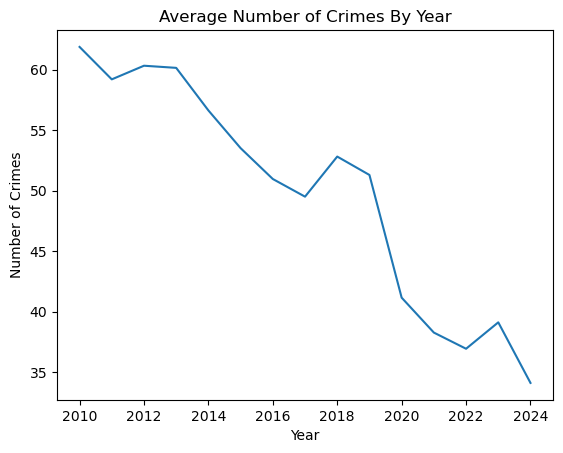

In [55]:
plt.plot(merged2.groupby(merged2['year'])['count'].mean()) 
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title(f'Average Number of Crimes By Year')

plt.show()

In [60]:

crimes2 = crimes[(crimes['FBI Code'] == '01A') | 
                 (crimes['FBI Code'] == '02') | 
                 (crimes['FBI Code'] == '03') | 
                 (crimes['FBI Code'] == '04A')]
crime_count2 = pd.DataFrame(crimes2['date'].value_counts().reset_index())

In [68]:
merged3 = pd.merge(crime_count2, weather, on='date', how='left')
merged3 = pd.merge(merged3, full_moon, on='date', how = 'left')
merged3 = pd.merge(merged3, holidays, on='date', how = 'left')
merged3 = pd.merge(merged3, unemploy, on='date', how = 'left')

merged3 = merged3[merged3['date'].dt.year > 2009]
merged3 = merged3.sort_values(by = 'date')

merged3['CHIC917URN'] = merged3['CHIC917URN'].fillna(method='ffill')

merged3['day_of_week'] = pd.to_datetime(merged3['date']).dt.day_of_week
merged3['year'] = pd.to_datetime(merged3['date']).dt.year
merged3['month'] = pd.to_datetime(merged3['date']).dt.month
merged3.head()

,date,count,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,description,icon,stations,full_moon,Holiday,Day of Week,CHIC917URN,day_of_week,year,month
9,2010-01-01,13,"Chicago,United States",-8.3,-14.5,-11.7,-15.0,-22.4,-19.0,-16.1,...,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,...",NaN,New Year's Day,Friday,12.2,4,2010,1
3758,2010-01-02,4,"Chicago,United States",-11.4,-16.4,-14.1,-18.4,-25.3,-22.6,-19.6,...,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,...",NaN,NaN,NaN,12.2,5,2010,1
6103,2010-01-03,3,"Chicago,United States",-7.9,-17.5,-12.5,-14.7,-25.6,-20.5,-17.6,...,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,...",NaN,NaN,NaN,12.2,6,2010,1
6401,2010-01-04,3,"Chicago,United States",-7.4,-13.1,-10.2,-14.4,-21.3,-17.6,-14.6,...,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,74466504838,...",NaN,NaN,NaN,12.2,0,2010,1
3621,2010-01-05,4,"Chicago,United States",-5.1,-9.5,-7.9,-11.7,-15.9,-14.2,-12.3,...,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,74466504838,...",NaN,NaN,NaN,12.2,1,2010,1


In [69]:
num_features = merged3[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month', 'CHIC917URN']]

y = list(merged3['count'])

numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor())])

X_train, X_test, y_train, y_test = train_test_split(num_features, y, test_size=0.25, random_state=42)

numeric = numeric.fit(X_train, y_train)

y_pred = numeric.predict(X_test)  
mean_absolute_error(y_test, y_pred) 

1.6942754777070066

In [70]:
rf_model = numeric.named_steps['model']

feature_importances = rf_model.feature_importances_

original_numeric_feature_names = num_features.columns

feature_importance_df = pd.DataFrame({'Feature': original_numeric_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
15  sealevelpressure    0.072382
13         windspeed    0.070336
22         moonphase    0.069846
14           winddir    0.065853
6           humidity    0.062380
16        cloudcover    0.061504
26        CHIC917URN    0.052357
12          windgust    0.051162
1            tempmin    0.042050
4       feelslikemin    0.040488
18    solarradiation    0.040250
3       feelslikemax    0.037500
24              year    0.035263
25             month    0.035240
0            tempmax    0.034316
17        visibility    0.031917
19       solarenergy    0.031577
23       day_of_week    0.031126
5          feelslike    0.028965
2               temp    0.027823
7             precip    0.023881
20           uvindex    0.018043
9        precipcover    0.015187
11         snowdepth    0.011183
10              snow    0.005429
8         precipprob    0.002004
21        severerisk    0.001937


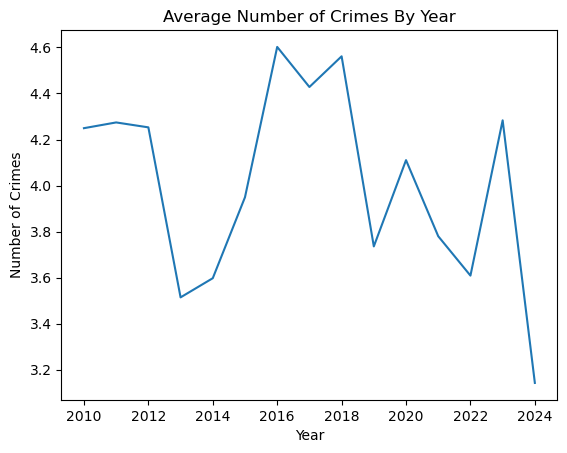

In [72]:
plt.plot(merged3.groupby(merged3['year'])['count'].mean()) 
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title(f'Average Number of Crimes By Year')

plt.show()